<b>In this practical exam you are required to do the following:</b><b>
1. Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.
2. Update your implementation to work for mini-batch.
</b>

### Please fulfil the following requirements:
<br>
<b>
    
    1. Each implementation must be in a sepearate function. i.e. two separate functions.
    2. Check each function on the data in the attached file.
    3. You must obtain r2-score > 0.9 using each functiion.
    4. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    5. Choose hyper parameters to obtain the required accuracy.
    6. The implementation must be vectoried and calculations must be performed as matrix vector multiplications.
    7. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>
    
<b><i>Note: You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b>

## Best of Luck...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import math
import seaborn as sns

In [2]:
df= pd.read_csv("C:/Users/Abdellrahman Amgad/Desktop/MultipleLR.csv", header=None)

In [3]:
y = np.array(df[3])
y
del df[3] 
x_input_0=np.ones(25).reshape(len(y),1)
x_input=np.concatenate((x_input_0,np.array(df)),axis = 1)

In [4]:
y=y.reshape(len(y),1)

In [5]:
#using batch
def cost_funcc(thetas,x,y):
    m=len(y)
    predictions=x.dot(thetas)
    cost=(1/(2*m))*np.sum(np.square(predictions-y))
    return cost

def adam(x_input,y,theta,learning_rate,iterations,beta1=0.9,beta2=0.99):
  #-------------------------------------------------
    thetas=np.zeros((x_input.shape[1],1))
    m=len(x_input)
    all_theta=[]
    grad=[]
    all_cost=np.zeros(iterations)
    costs=[]
    theta_1,theta_2,theta_3,theta_4=[],[],[],[]
    cost_history=np.zeros(iterations)
    vt=np.ones((x_input.shape[1],1))                 #len(thetas)
    mt=np.zeros((x_input.shape[1],1))
    epslon = 10**-8
    for k in range(iterations):
        hypothesis=x_input@thetas
        dt=(1/(m))*(x_input.T.dot((hypothesis-y)))
        grad.append(dt)
        vt=(beta1*vt)+((1-beta1)*(dt**2))       #same size as thetas
        mt=(beta2*mt)+((1-beta2)*dt)
        thetas=thetas-((learning_rate*mt)/(epslon+(vt**0.5)))
        all_theta.append(thetas)
        theta_1.append(thetas[0])
        theta_2.append(thetas[1])
        theta_3.append(thetas[2])
        theta_4.append(thetas[3])
        cost=cost_funcc(thetas,x_input,y)
        all_cost[k]=cost
        stop = abs(cost-all_cost[k-1])
        if stop<0.0001:
            return all_theta,all_cost[:k]
    return all_theta,cost_history,all_cost,theta_1,theta_2,theta_3,theta_4
thetas,cost_history,all_cost,theta_1,theta_2,theta_3,theta_4=adam(x_input,y,0,0.001,2000,beta1=0.9,beta2=0.99)

In [6]:
hypothesis=x_input@thetas[-1]
hypothesis.shape

(25, 1)

In [7]:
r2=r2_score(y,hypothesis)
print('your score in percentage is: ',r2*100,'%')

your score in percentage is:  97.79751664354119 %


Text(0, 0.5, 'cost')

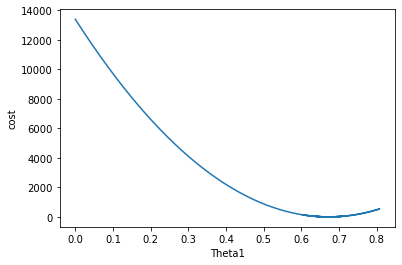

In [8]:
plt.plot(theta_1,all_cost)
plt.xlabel("Theta1")
plt.ylabel("cost")

Text(0, 0.5, 'cost')

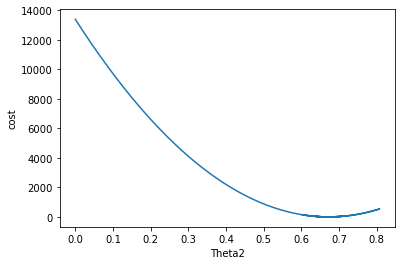

In [9]:
plt.plot(theta_2,all_cost)
plt.xlabel("Theta2")
plt.ylabel("cost")

Text(0, 0.5, 'cost')

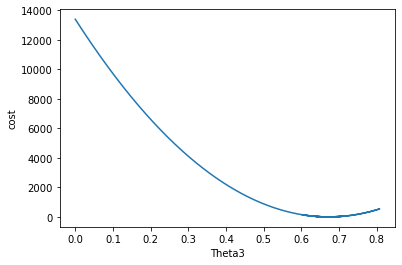

In [10]:
plt.plot(theta_3,all_cost)
plt.xlabel("Theta3")
plt.ylabel("cost")

Text(0, 0.5, 'cost')

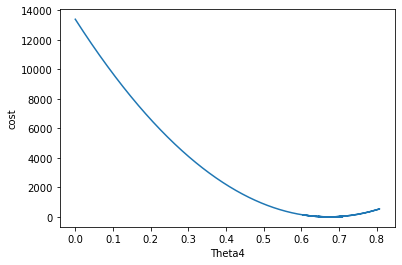

In [11]:
plt.plot(theta_4,all_cost)
plt.xlabel("Theta4")
plt.ylabel("cost")

Text(0, 0.5, 'cost')

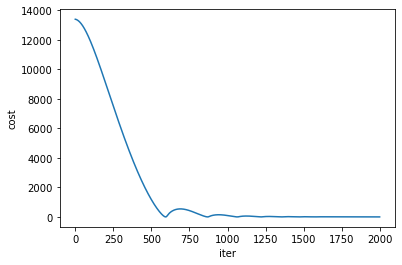

In [12]:
plt.plot(all_cost)
plt.xlabel("iter")
plt.ylabel("cost")

In [13]:
theta=np.array([[0],[0],[0],[0]])

In [14]:
#using mini_batch
def cost_funcc(thetas,x,y):
    m=len(y)
    predictions=x.dot(thetas)
    cost=(1/(2*m))*np.sum(np.square(predictions-y))
    return cost

def adam(x_input,y,theta,learning_rate,iterations,batch_size,beta1=0.9,beta2=0.99):
  #-------------------------------------------------
    thetas=np.zeros((x_input.shape[1],1))
    m=len(x_input)
    n=len(y)
    cost=0    
    all_theta=[]
    theta_1,theta_2,theta_3,theta_4=[],[],[],[]
    costs=[]
    all_cost=np.zeros(iterations)
    n_batches=int(m/batch_size)
    vt=np.ones((x_input.shape[1],1))                 #len(thetas)
    mt=np.zeros((x_input.shape[1],1))
    epslon = 10**-8
    for k in range(200):
        cost=0
        costs=np.zeros((x_input.shape[1],1))
        for i in range (0,len(x_input),5):
            x_batch1=np.array(x_input[i:i+5])
            y_batch1=np.array(y[i:i+5])
            hypothesis=x_batch1@thetas
            dt=(1/(m))*(x_batch1.T.dot((hypothesis-y_batch1)))
            vt=(beta1*vt)+((1-beta1)*(dt**2))       #same size as thetas
            mt=(beta2*mt)+((1-beta2)*dt)
            thetas=thetas-((learning_rate*mt)/(epslon+(vt**0.5)))
            #print(thetas)
            all_theta.append(thetas)
            theta_1.append(thetas[0])
            theta_2.append(thetas[1])
            theta_3.append(thetas[2])
            theta_4.append(thetas[3])
            cost=cost_funcc(thetas,x_batch1,y_batch1)
        all_cost[k]=cost
#--------------------------------------
        stop = abs(cost-all_cost[k-1])
        if stop<0.001:
            return all_theta,all_cost[:k]
    #print(vt)
    return all_theta,all_cost,k,theta_1,theta_2,theta_3,theta_4
thetas,all_cost,k,theta_1,theta_2,theta_3,theta_4=adam(x_input,y,0,0.005,1000,5,beta1=0.99,beta2=0.99)


In [15]:
hypothesis=x_input@thetas[-1]
hypothesis.shape

(25, 1)

In [16]:
r2=r2_score(y,hypothesis)
print('your score in percentage is: ',r2*100,'%')

your score in percentage is:  97.82889877834293 %


Text(0, 0.5, 'cost')

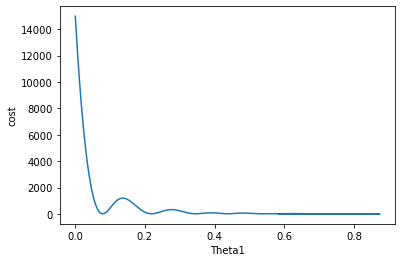

In [17]:
plt.plot(theta_1,all_cost)
plt.xlabel("Theta1")
plt.ylabel("cost")

Text(0, 0.5, 'cost')

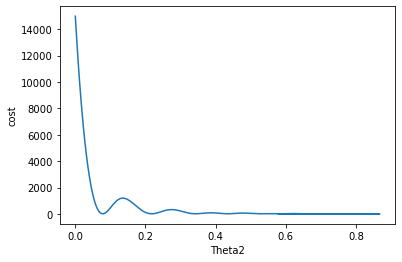

In [18]:
plt.plot(theta_2,all_cost)
plt.xlabel("Theta2")
plt.ylabel("cost")

Text(0, 0.5, 'cost')

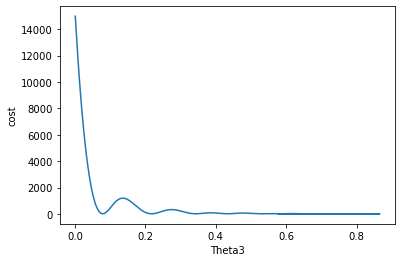

In [19]:
plt.plot(theta_3,all_cost)
plt.xlabel("Theta3")
plt.ylabel("cost")

Text(0, 0.5, 'cost')

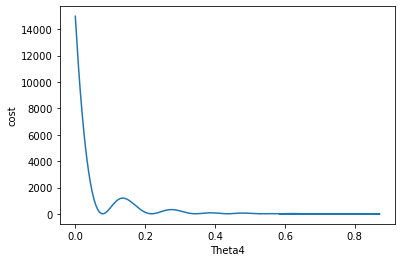

In [20]:
plt.plot(theta_4,all_cost)
plt.xlabel("Theta4")
plt.ylabel("cost")

Text(0, 0.5, 'cost')

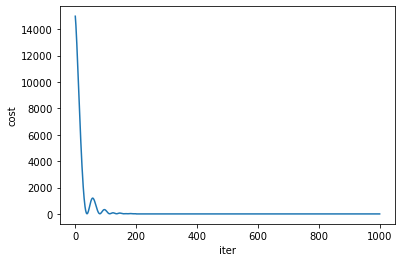

In [21]:
all_cost
plt.plot(all_cost)
plt.xlabel("iter")
plt.ylabel("cost")